# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica: Método de Simpson


### Ejercicio 15.- Se considera la integral $\displaystyle\int_{-2}^{1} \,e^{-x^2} \, dx$

### (a) Calcula la aproximación de dicha integral mediante el Método del Simpson con $n=10$ parábolas.

### (b) Da una cota superior teórica del error absoluto de la aproximación obtenida en (a).

### (c) Compara tu aproximación con la calculada por SAGE y representa gráficamente el problema.

SOLUCIÓN

### (a) Calcula la aproximación de dicha integral mediante el Método del Simpson con $n=10$ parábolas.


En el <strong>Método de Simpson</strong> subdividimos el intervalo $[a,b]$ con los siguientes $2n+1$ nodos equiespaciados: $$x_j=a+j\cdot \frac{b-a}{2n}$$ para $j=0,1,\dots,2n$.


La fórmula del Método de Simpson aproxima la integral de la siguiente forma:

 $$  \int_a^b f(x) \, dx \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{b-a}{6n}\left(f(a)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(b)\right) $$ 


In [1]:
f(x)=exp(-x^2)#definimos la función
show(f)

x |--> e^(-x^2)

In [2]:
a=-2 #definimos el intervalo
b=1
a,b

(-2, 1)

In [3]:
n=10 #definimos el número de parábolas

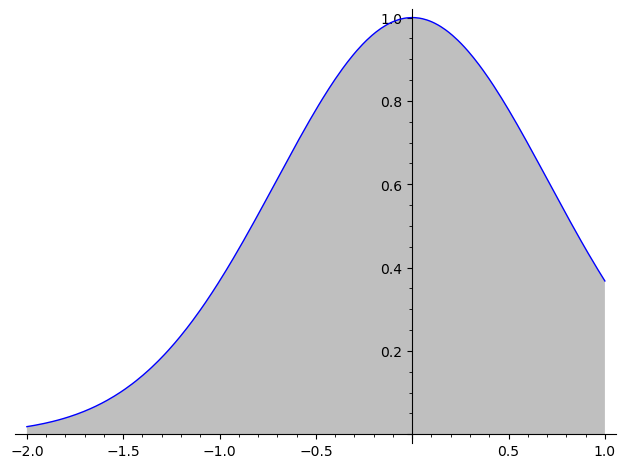

In [4]:
plot(f,a,b,fill=True) #veamos que área se quiere aproximar

In [5]:
integrate(f,x,a,b).n()

1.62890552357485

In [6]:
#definimos los nodos; recordad que son 2n+1
X=[a+k*(b-a)/(2*n) for k in [0..2*n]] 
show(X)

[-2,
 -37/20,
 -17/10,
 -31/20,
 -7/5,
 -5/4,
 -11/10,
 -19/20,
 -4/5,
 -13/20,
 -1/2,
 -7/20,
 -1/5,
 -1/20,
 1/10,
 1/4,
 2/5,
 11/20,
 7/10,
 17/20,
 1]

 Ahora aplicamos la fórmula del Método de Simpson: 
 $$  \int_a^b f(x) \, dx \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{b-a}{6n}\left(f(a)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(b)\right) $$ 

In [7]:
simpson=(b-a)/(6*n)*(f(a)+4*sum(f(X[2*k-1]) for k in range(1,n+1))+2*sum(f(X[2*k]) for k in range(1,n))+f(b))
numerical_approx(simpson)

1.62890757516897

### (b) Da una cota superior teórica del error absoluto de la aproximación obtenida en (a):

#### Cota del error en el Método de Simpson

La cota del error absoluto cometido en el Método de Simpson la podemos dar de la siguiente forma: 

 $$  \left|\int_a^b f(x) \, dx-{\rm Simpson}_{ {{\bf n}}}(f)\right|   \leq  \frac{(b-a)M}{180} \cdot {h^4}, h=\dfrac{b-a}{2n} $$ 
 o bien
 $$  \left|\int_a^b f(x) \, dx-{\rm Simpson}_{ {{\bf n}}}(f)\right|   \leq  \dfrac{(b-a)^5}{180\cdot  (2\cdot n)^4}\cdot M  $$ 
siendo $M>0$ una constante tal que $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$. 

En este ejercicio, tenemos:  
$$\displaystyle \left| \int_{-2}^{1} f(x) \, dx-{\rm Simpson}_{10}(f)\right| \leq \dfrac{(1-(-2))}{180}\cdot  \dfrac{(1-(-2))^4}{(2\cdot 10)^4}\cdot M=\dfrac{M·(1-(-2))^5}{180·(2\cdot 10)^4}$$ 
    
Para determinar $M$ calculamos $f^{(4)}(x)$ y la representamos gráficamente en $[-2,1]$: 

In [8]:
show(diff(f(x),x,4))

16*x^4*e^(-x^2) - 48*x^2*e^(-x^2) + 12*e^(-x^2)

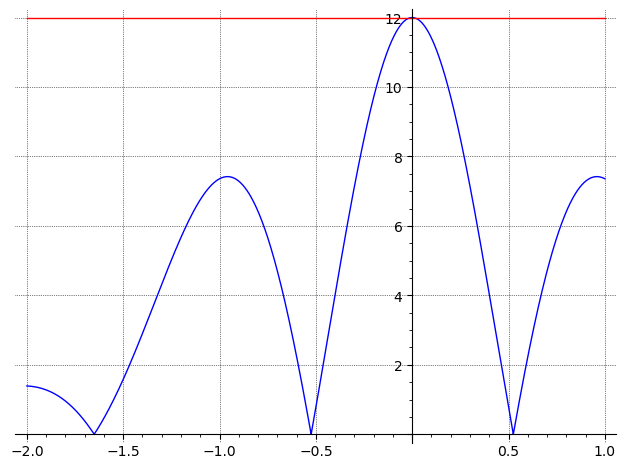

In [9]:
plot(abs(derivative(f(x),x,4)),(x,a,b),gridlines=True)+plot(12,a,b,color='red')

<p>En esta gráfica se observa que la constante $M=12$ cumple $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$.</p>
<p>Por tanto, una cota superior del error absoluto cometido es:</p>

In [10]:
M=12;
cota=M*(b-a)^5/(180*(2*n)^4);
numerical_approx(cota)

0.000101250000000000

### (c) Compara tu aproximación con la calculada por SAGE y representa gráficamente el problema.


Vamos a comprobar que efectivamente el error cometido es menor que la cota obtenida. Para ello comparamos nuestro resultado con Simpson con el dado por SAGE al principio de la práctica.

In [11]:
numerical_approx(integral(f(x),x,a,b))

1.62890552357485

In [12]:
simpson.n()

1.62890757516897

<p>y la comparamos con el resultado obtenido por el método de Simpson calculando el valor absoluto de la diferencia:</p>

In [13]:
error=abs(simpson-numerical_approx(integral(f(x),x,a,b)));
error.n()<cota

True

Veamos gráficamente lo qué hemos calculado con el método de SIMPSON, o sea, el área delimitada por las diferentes parábolas definidas por el polinomio interpolador de Lagrange.

# NOTA:  En la evaluación de la práctica puede entrar la realización de dicha gráfica. 

Comenzamos definiendo los nodos y los puntos y definiendo el polinomio usando las sentencias "piecewise" y "lagrange_polymomial".

In [14]:
XY=[(X[j],numerical_approx(f(X[j]))) for j in range(0,2*n+1)];

In [15]:
#show(XY)

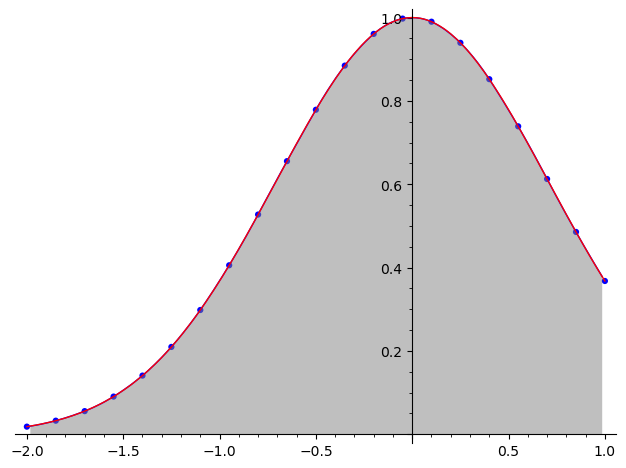

In [16]:
P=piecewise([ [ (X[2*(i-1)],X[2*i]),RR['x'].lagrange_polynomial([XY[2*(i-1)],XY[2*i-1],XY[2*i]]) ] for i in [1..n] ],var=x)
plot(P,a,b,fill=True)+plot(f,x,a,b,color='red')+point(XY,size=20)

<p>Forma alternativa de hacer el plot, sin el piecewise:</p>

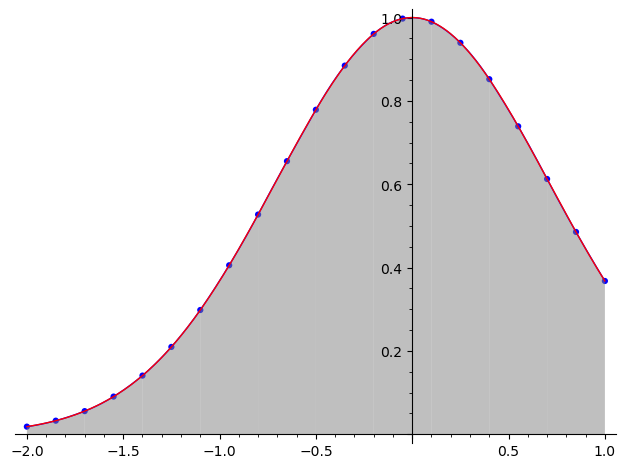

In [17]:
sum(plot(RR['x'].lagrange_polynomial([XY[2*k],XY[2*k+1],XY[2*k+2]]),X[2*k],X[2*k+2],fill=True) for k in range(0,n))+plot(f,x,a,b,color='red')+point(XY,size=20)